# Assignment 1 - Joseph Kaminetz
### Understanding Uncertainty
### Due 9/5

1. Create a new public repo on Github under your account. Include a readme file.
2. Clone it to your machine. Put this file into that repo.
3. Use the following function to download the example data for the course:

In [19]:
def download_data(force=False):
    """Download and extract course data from Zenodo."""
    import urllib.request, zipfile, os
    
    zip_path = 'data.zip'
    data_dir = 'data'
    
    if not os.path.exists(zip_path) or force:
        print("Downloading course data")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/16954427/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")
    else:
        print("Download file already exists")
        
    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")
    else:
        print("Data directory already exists")

download_data()

Download file already exists
Data directory already exists


4. Open one of the datasets using Pandas:
    1. `ames_prices.csv`: Housing characteristics and prices
    2. `college_completion.csv`: Public, nonprofit, and for-profit educational institutions, graduation rates, and financial aid
    3. `ForeignGifts_edu.csv`: Monetary and in-kind transfers from foreign entities to U.S. educational institutions
    4. `iowa.csv`: Liquor sales in Iowa, at the transaction level
    5. `metabric.csv`: Cancer patient and outcome data
    6. `mn_police_use_of_force.csv`: Records of physical altercations between Minnessota police and private citizens
    7. `nhanes_data_17_18.csv`: National Health and Nutrition Examination Survey
    8. `tuna.csv`: Yellowfin Tuna Genome (I don't recommend this one; it's just a sequence of G, C, A, T )
    9. `va_procurement.csv`: Public spending by the state of Virginia

In [20]:
import pandas as pd
import numpy as np
ames = pd.read_csv('data/ames_prices.csv')

5. Pick two or three variables and briefly analyze them
    - Is it a categorical or numeric variable?
    - How many missing values are there? (`df['var'].isna()` and `np.sum()`)
    - If categorical, tabulate the values (`df['var'].value_counts()`) and if numeric, get a summary (`df['var'].describe()`)

Street
Pave    2918
Grvl      12
Name: count, dtype: int64
0


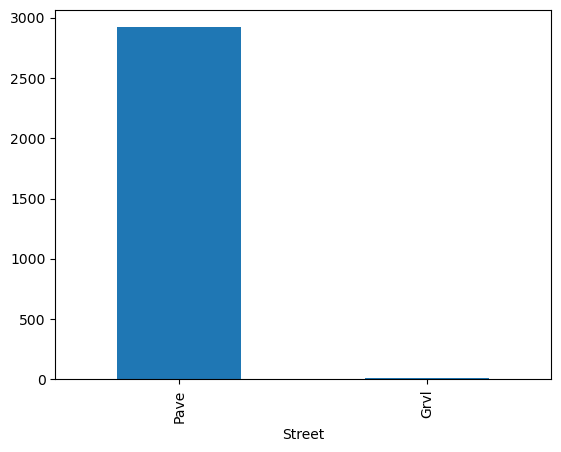

In [21]:
ames.head()
ames['Street'].value_counts()
ames['Street'].value_counts().plot(kind='bar')
print(ames['Street'].value_counts())
street_na = ames['Street'].isna()
print(street_na.sum())

Street appears to be a categorical variable with 2 factors, pave and gravel. Based on this, I imagine it describes the material of the road that the particular house is at. The classes are extremely imbalanced as there are almost 200 times more paved roads than gravel roads. There are no N/A values.

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64
0


<Axes: >

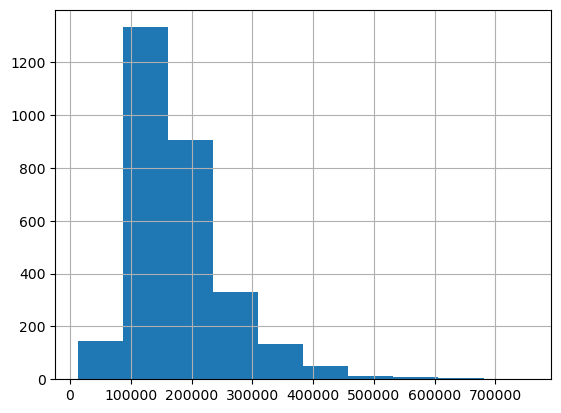

In [22]:
print(ames['price'].describe())
NAs_in_price = ames['price'].isna()
print(NAs_in_price.sum())
ames['price'].hist()



Price seems to describe the price of the houses sold in Ames Iowa. It is a numeric variable with no N/A values. As we can see by the histogram and the summary table, the average house sells for about $180,000, but the data doesn't appear symetrical. The median would be a better measure of center, around $160,000. 

6. What are some questions and prediction tools you could create using these data? Who would the stakeholder be for that prediction tool? What practical or ethical questions would it create? What other data would you want, that are not available in your data?

There are a lot of questions one could ask in regards to this data. One could ask a very general question, for example, "What factors impact the price of a house the most". To answer this question, you could use a random forest model to predict housing price and then use the importance values to see which factors make the strongest affect. While this wouldn't tell you how these variables impact housing, it could tell you which factors are the most important. If you wanted to know how each factor affects housing price you could use multiple linear regression to create a predictie model. The stakeholders for this tool would probably be a real estate agent, who could use it to accurate price houses on the market, or a developer who could use this model to build houses that will sell for more money. There are some questions regarding whether each observation is independent or not, as the housing market can be dependent on previous sales. I don't believe there are any privacy issues with this data. Some additional relevant information that could be had would be the number of bedrooms and bathrooms and the region of Ames the house was sold in.

If you wanted to ask a more specific question about how a particular variable affects price, you could ask something like "Does housing price increase over time". To answer this question, you could run an ANOVA test where each year is it's own factor and see whether housing price is different based on different years. This question might be relevant for economists who might want to know how the state of economy affects housing. More specific dates than just year would be more relevant. The same practical question as the previous question applies here as the observations are probably not independent. 

7. Commit your work to the repo (`git commit -am 'Finish assignment'` at the command line, or use the Git panel in VS Code). Push your work back to Github and submit the link on Canvas in the assignment tab.